# Parametric Classification Models

## Machine Learning Methods 


### Module 4: Parametric Classification Models

### Instructor: Farhad Pourkamali



### Overview 
<hr style="border:2px solid gray">

1. Logistic regression: Problem formulation, assumption, loss function, gradient
2. Logistic regression in Scikit-learn (sklearn)
- Video for parts 1 and 2: https://youtu.be/N_4nVvcYQHo
3. Evaluation metrics: https://youtu.be/vzv4Q7Fq98s
4. Multiclass classification: https://youtu.be/UoN7O4cJat0



### Logistic regression
<hr style="border:2px solid gray">

* Logistic regression involves a probabilistic model of the form $p(y|\mathbf{x};\boldsymbol{\theta})$, where $\mathbf{x}\in\mathbb{R}^D$ is a fixed-dimensional input vector 
    * $C=2$: binary logistic regression $\rightarrow y\in\{0,1\}$ 
    * $C>2$: multinomial/multiclass logistic regression $\rightarrow y\in\{1,2,\ldots,C\}$
    
* Recall the probability mass function (pmf) of the Bernoulli distribution 
\begin{equation*}
Ber(y|\theta)=\begin{cases}\theta &\text{ if } y=1\\1-\theta &\text{ if } y=0\end{cases}=\theta^y(1-\theta)^{1-y}
\end{equation*}

* Binary logistic regression

\begin{equation*}
p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\color{red}{\sigma(f(\mathbf{x};\boldsymbol{\theta}))})
\end{equation*}

* The function $\color{red}{f(\mathbf{x}; \boldsymbol{\theta})}$ is a linear combination of the input features, i.e., $f(\mathbf{x}; \boldsymbol{\theta}) = \mathbf{x}^\top \boldsymbol{\theta}$, which is transformed by the sigmoid function $\color{red}{\sigma(a) = \frac{1}{1 + e^{-a}}}$ to map the linear output into a probability space


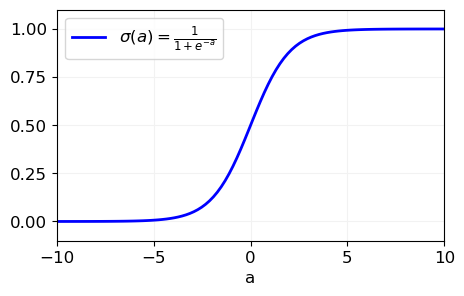

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})

a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) = \frac{1}{1 + e^{-a}}$")
plt.xlabel("a")
plt.legend(loc="upper left")
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.95')
plt.show()

### Properties of sigmoid function
<hr style="border:2px solid gray">

* The derivative of $\sigma(a)$ has a nice form

\begin{align*}
\sigma(a)&=\frac{1}{1+e^{-a}}=(1+e^{-a})^{-1}\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(1+e^{-a})'\\
\frac{d}{da}\sigma(a)&=(-1)(1+e^{-a})^{-2}(-e^{-a})\\
\frac{d}{da}\sigma(a)&=\frac{1}{1+e^{-a}}\frac{e^{-a}}{1+e^{-a}}=\sigma(a)(1-\sigma(a))
\end{align*}


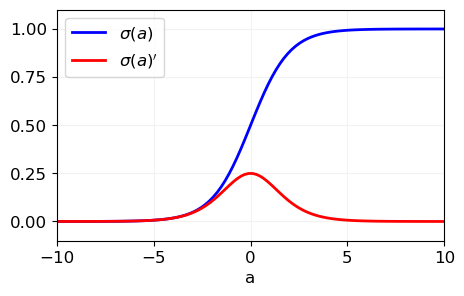

In [2]:
a = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-a))
plt.plot(a, sig, "b-", linewidth=2, label=r"$\sigma(a) $")
plt.plot(a, sig*(1-sig), "r-", linewidth=2, label=r"$\sigma(a)'$")
plt.xlabel("a")
plt.legend(loc="upper left")
plt.axis([-10, 10, -0.1, 1.1])
plt.grid(color='0.95')
plt.show()

### Binary classification
<hr style="border:2px solid gray">

* Plugging the definition of the sigmoid function

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(a)=\frac{1}{1+e^{-a}}=\frac{e^a}{1+e^a}$$
$$p(y=0|\mathbf{x};\boldsymbol{\theta})=1-\sigma(a)=\frac{e^{-a}}{1+e^{-a}}=\frac{1}{1+e^a}$$

* The quantity $a$ is known as the log-odds or logit

$$\log\Big(\frac{p(y=1|\mathbf{x};\boldsymbol{\theta})}{p(y=0|\mathbf{x};\boldsymbol{\theta})}\Big)=\log\Big(e^a\Big)=a$$

* The inverse of the sigmoid function is called the *logit function*

$$\sigma^{-1}(p)=\log\big(\frac{p}{1-p}\big):=\text{logit}(p)$$

* Hence, the sigmoid (or logistic) function is an invertible function that allows us to:
     - Convert a continuous number $a$ into the probability space $[0, 1]$ using $\sigma(a)$
     - Convert a probability back into the corresponding log-odds using the logit function $\text{logit}(p)$

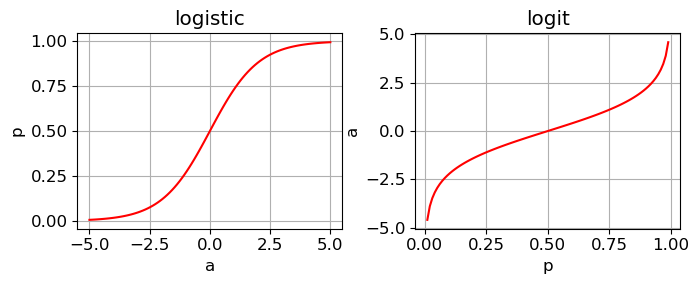

In [3]:
import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(7,3))

# expit 
x = np.linspace(-5, 5, 100)
ax[0].plot(x, expit(x), 'r')
ax[0].set_xlabel('a')
ax[0].set_ylabel('p')
ax[0].grid()
ax[0].set_title('logistic')

# logit 
x = np.linspace(0, 1, 100)
ax[1].plot(x, logit(x), 'r')
ax[1].set_xlabel('p')
ax[1].set_ylabel('a')
ax[1].grid()
ax[1].set_title('logit')

plt.tight_layout()
plt.show()

### Linear model for binary logistic regression
<hr style="border:2px solid gray">

* Use a linear function of the form $f(\mathbf{x};\boldsymbol{\theta})=\boldsymbol{\theta}^T\mathbf{x}$, yielding the following pmf

$$p(y|\mathbf{x};\boldsymbol{\theta})=Ber(y|\sigma(\boldsymbol{\theta}^T\mathbf{x}))$$

* Thus, we get 

$$p(y=1|\mathbf{x};\boldsymbol{\theta})=\sigma(\boldsymbol{\theta}^T\mathbf{x})=\frac{1}{1+\exp(-\boldsymbol{\theta}^T\mathbf{x})}$$



### Optimal Decision Rule for Predicting $y=1$
<hr style="border:2px solid gray">

* **Starting point - Probability comparison**:  
  The optimal decision rule is based on comparing the probabilities of the two classes. To predict $y=1$, we check if:
  $$p(y=1|\mathbf{x}) > p(y=0|\mathbf{x})$$

* **Log-odds transformation**:  
  Using the definition of log-odds (logit), the inequality can be rewritten as:
  $$\log \frac{p(y=1|\mathbf{x})}{p(y=0|\mathbf{x})} > 0$$
  This shows that predicting $y=1$ is equivalent to determining whether the log-odds are positive

* **Linear form of log-odds**:  
  For logistic regression, the log-odds are given by:
  $$\log \frac{p(y=1|\mathbf{x})}{p(y=0|\mathbf{x})} = \boldsymbol{\theta}^\top \mathbf{x}$$
  Thus, the decision rule reduces to:
  $$\boldsymbol{\theta}^\top \mathbf{x} > 0.$$

* **Interpretation of the rule**:  
  - If $\boldsymbol{\theta}^\top \mathbf{x} > 0$, we predict $y=1$  
  - If $\boldsymbol{\theta}^\top \mathbf{x} \leq 0$, we predict $y=0$  
  This shows that the **decision boundary** is defined by the hyperplane $\boldsymbol{\theta}^\top \mathbf{x} = 0$, which separates the feature space into two regions


* **Geometric intuition**:  
  - The vector $\boldsymbol{\theta}$ determines the orientation of the decision boundary in the feature space  
  - The magnitude of $\boldsymbol{\theta}^\top \mathbf{x}$ indicates how confidently a sample is classified, with larger values implying higher certainty


### Loss function
<hr style="border:2px solid gray">

* Logistic regression model estimates probabilities and makes predictions. But how is it trained?

* Let us define $\mu_n=\sigma(a_n)$ and $a_n=\boldsymbol{\theta}^T\mathbf{x}_n$

* The loss function $l(y_n, \mu_n)$ quantifies the error between the true label $y_n$ and the predicted probability $\mu_n$

$$l(y_n,\mu_n)=\text{H}_{ce}(y_n,\mu_n)=\begin{cases}-\log(\mu_n) & \text{ if } y_n=1 \\ -\log(1-\mu_n) &\text{ if } y_n=0\end{cases}$$

* When the true label $y_n=1$, the model is penalized based on the negative logarithm of the predicted probability $\mu_n$
    * If $\mu_n$ is close to 1, the penalty is small; if it’s close to 0, the penalty is large

* When $y_n=0$, the model is penalized based on the negative logarithm of $1-\mu_n$, which represents the predicted probability of $y_n=0$  

* Essentially, the loss is the **negative log of the probability assigned to the correct class**


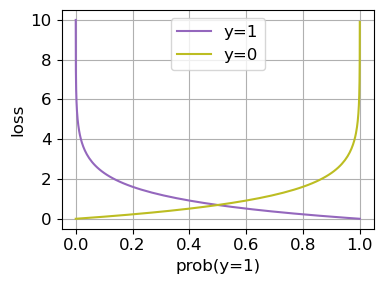

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from scipy.special import expit

def cross_entropy_loss(y, mu):
    if y == 1:
        return -np.log(mu)
    else:
        return -np.log(1 - mu)

z = np.arange(-10, 10, 0.1)
mu_z = expit(z)

cost_1 = cross_entropy_loss(1, mu_z) # when y = 1
cost_0 = cross_entropy_loss(0, mu_z) # when y = 0 

fig, ax = plt.subplots(figsize=(4,3))
plt.plot(mu_z, cost_1, 'C4-', label='y=1')
plt.plot(mu_z, cost_0, 'C8-', label='y=0')
plt.xlabel('prob(y=1)')
plt.ylabel('loss')
plt.tight_layout()
plt.legend()
plt.grid()
plt.show()

### Loss function

<hr style="border:2px solid gray">

* The loss function over the whole training set is the average loss over all training samples

$$\mathcal{l}(\boldsymbol{\theta})=-\frac{1}{N}\sum_{n=1}^N \big[y_n\log \mu_n + (1-y_n) \log(1-\mu_n)\big]$$

* Can we compute the gradient? Recall the data matrix $\mathbf{X}\in\mathbb{R}^{N\times D}$ and target vector $\mathbf{y}\in\mathbb{R}^N$

$$\nabla l(\boldsymbol{\theta})=\frac{1}{N}\mathbf{X}^T\Big(\sigma\big(\mathbf{X}\boldsymbol{\theta}\big)-\mathbf{y}\Big)$$


* Thus, partial derivatives can be written as 

$$\frac{\partial}{\partial \theta_j}\mathcal{l}(\boldsymbol{\theta})=\frac{1}{N}\sum_{n=1}^N x_{n,j}\Big(\sigma\big(\mathbf{x}_n^T\boldsymbol{\theta}\big)-y_n\Big)$$


### 2. Logistic regression in Scikit-learn (sklearn)

In [5]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

list(iris)


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [6]:
iris['data'] 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris['target'].value_counts(normalize=True)

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [10]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [11]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
print(y_proba)


[[0.99820801 0.00179199]
 [0.99818732 0.00181268]
 [0.99816638 0.00183362]
 ...
 [0.00578965 0.99421035]
 [0.00572381 0.99427619]
 [0.00565872 0.99434128]]


In [12]:
X_new[y_proba[:, 1] >= 0.5]

array([[1.65165165],
       [1.65465465],
       [1.65765766],
       [1.66066066],
       [1.66366366],
       [1.66666667],
       [1.66966967],
       [1.67267267],
       [1.67567568],
       [1.67867868],
       [1.68168168],
       [1.68468468],
       [1.68768769],
       [1.69069069],
       [1.69369369],
       [1.6966967 ],
       [1.6996997 ],
       [1.7027027 ],
       [1.70570571],
       [1.70870871],
       [1.71171171],
       [1.71471471],
       [1.71771772],
       [1.72072072],
       [1.72372372],
       [1.72672673],
       [1.72972973],
       [1.73273273],
       [1.73573574],
       [1.73873874],
       [1.74174174],
       [1.74474474],
       [1.74774775],
       [1.75075075],
       [1.75375375],
       [1.75675676],
       [1.75975976],
       [1.76276276],
       [1.76576577],
       [1.76876877],
       [1.77177177],
       [1.77477477],
       [1.77777778],
       [1.78078078],
       [1.78378378],
       [1.78678679],
       [1.78978979],
       [1.792

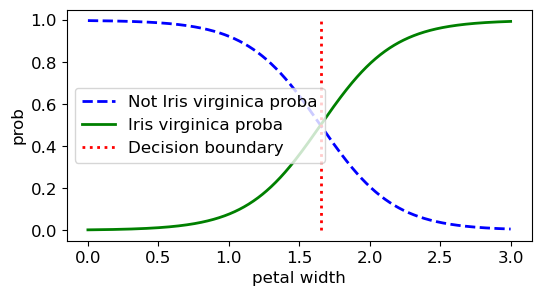

In [13]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(6, 3))  
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "r:", linewidth=2,
         label="Decision boundary")
plt.xlabel('petal width')
plt.ylabel('prob')
plt.legend()
plt.show()

In [14]:
log_reg.predict_proba(X_test[:5])

array([[0.84890373, 0.15109627],
       [0.99436711, 0.00563289],
       [0.0767371 , 0.9232629 ],
       [0.6403484 , 0.3596516 ],
       [0.72310724, 0.27689276]])

In [15]:
log_reg.predict(X_test[:5])

array([False, False,  True, False, False])

### 3. Evaluation metrics

* MNIST is one of the most popular benchmark data sets in machine learning, which can be accessed via scikit-learn 
    * Thus, it involves minimal to no preprocessing 

* 70,000 images, each labeled with the digit it represents
    * Each image is 28 x 28 pixels, i.e., a 2D array, but stored as a 1D array with 784 features
        + Note that $28^2=784$
    * Each feature shows the intensity of one pixel 
        + The grayscale intensity values between 0 and 255,  corresponding to shades of gray
        + 0 being the lightest (white) and 255 being the darkest (black)
        
* Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

In [16]:
import numpy as np

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [17]:
mnist['data'].shape # 70,000 images in R^784 

(70000, 784)

In [18]:
mnist['target'] # 70,000 labels 

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [19]:
# Identify input features and labels 

X, y = mnist.data, mnist.target

In [20]:
# Let us look at the label of this image and its type

print(y[0],'\n', type(y[0]))

5 
 <class 'str'>


In [21]:
# train/test split 

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [22]:
# create a binary classification problem (detecting digit 5) 

y_train_5 = (y_train == '5')

y_test_5 = (y_test == '5')

y_train_5[:10] 

array([ True, False, False, False, False, False, False, False, False,
       False])

In [23]:
# We select a classifier and measure its "accuracy" using cross validation 

from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score

sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

# accuracy: the fraction of correct predictions over the total number of samples 
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.9687 , 0.9616 , 0.96165])

In [24]:
# Let us investigate this "amazing" result more by defining a 
# classifier that always returns False  

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass  # no training 
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool) # return False for every input image 
    

cross_val_score(Never5Classifier(), X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

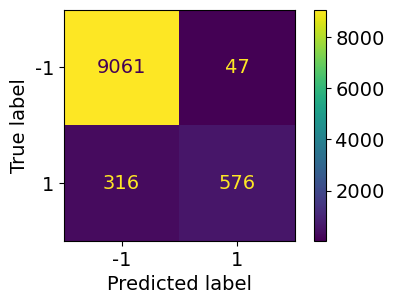

In [25]:
# In this cell, we investigate one of the most popular ways of evaluating classifiers 

sgd_clf = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42)

sgd_clf.fit(X_train, y_train_5)

y_pred_5 = sgd_clf.predict(X_test)

import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams.update({'font.size': 14, "figure.figsize": (5,3)})

ConfusionMatrixDisplay.from_predictions(y_test_5, y_pred_5, display_labels=np.array([-1,1]))

plt.show()

### Confusion matrix 
<hr style="border:2px solid gray">

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class

    * The first row of this matrix considers non-5 images (negative class)
    * The second row considers the images of 5s (positive class)
    
    <img src="https://github.com/farhad-pourkamali/MATH6388/blob/main/images/confusion_matrix.png?raw=true\" width=300>
    

In [26]:
from sklearn.metrics import precision_score, recall_score

print("Precision: %0.2f" %precision_score(y_test_5, y_pred_5))

print("Recall: %0.2f" %recall_score(y_test_5, y_pred_5))

Precision: 0.92
Recall: 0.65


### Precision and recall
<hr style="border:2px solid gray">

* We can combine precision and recall into a single metric called the $F_1$ score using the harmonic mean
    * A classifier gets a high $F_1$ score if both recall and precision are high 
    
$$F_1=\frac{2}{\frac{1}{\text{pre}}+ \frac{1}{\text{rec}}}=2\times \frac{\text{pre}\times \text{rec}}{\text{pre} + \text{rec}}$$

* Also, we can plot precision/recall values as a function of the threshold used for classification 
    - Most classifiers, such as logistic regression or deep networks, output a **score** $S(\mathbf{x})=P(y=1 | \mathbf{x})$ that represents the probability (or confidence) of a sample being in the positive class:

    - To make a classification decision, we set a **threshold** $\tau$ and classify a sample as positive if:

\begin{equation}
S(\mathbf{x}) \geq \tau
\end{equation}

and negative otherwise

- High Threshold $\tau$ (e.g., 0.9): Only very confident positive predictions are classified as positive → High precision, low recall
- Low Threshold $\tau$ (e.g., 0.1): Many uncertain cases are classified as positive → High recall, but more false positives (lower precision)

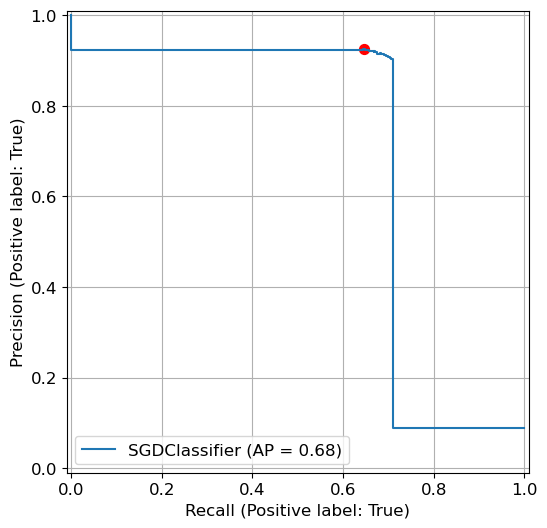

In [27]:
from sklearn.metrics import PrecisionRecallDisplay

plt.rcParams.update({'font.size': 12, "figure.figsize": (7,6)})

# Use the fitted classifier sgd_clf
PrecisionRecallDisplay.from_estimator(sgd_clf, X_test, y_test_5)

# Previous results 
plt.scatter(recall_score(y_test_5, y_pred_5), precision_score(y_test_5, y_pred_5), c = 'r', s=50)

plt.grid()

plt.show()

* What Does AP Measure?
    - AP measures the **area under the PR curve** by summing the contribution of **precision values at different recall levels**

    - Instead of computing the exact integral under the curve (which is continuous), **AP uses a discrete approximation** by dividing the area into small trapezoidal sections

\begin{equation}
AP = \sum_{i=1}^{n} (R_i - R_{i-1}) P_i
\end{equation}

Where:
- $P_i$ is the precision at recall $R_i$
- $R_i - R_{i-1}$ is the change in recall (width of the step)
- The summation approximates the integral of precision over recall

### 4. Multiclass classification


### Multinomial Logistic Regression
<hr style="border:2px solid gray">

* **Generalizing binary classification to multiple classes**:  
  To represent a distribution over $C$ possible classes $y \in \{1, \ldots, C\}$, we use the categorical distribution, which generalizes the Bernoulli distribution for $C > 2$. The categorical distribution is given by:
  $$\text{Cat}(y|\boldsymbol{\theta}) = \prod_{c=1}^C \theta_c^{I(y=c)}$$
  where:  
  - $\boldsymbol{\theta} = [\theta_1, \ldots, \theta_C]$ is the probability vector such that $0 \leq \theta_c \leq 1$ and  $\sum_{c=1}^C \theta_c = 1$  
  - $I(y=c)$ is an indicator function that equals 1 if $y = c$, and 0 otherwise  

* **Modeling class probabilities**:  
  A multinomial logistic regression model represents the probability of class $y$ as:
  $$p(y|\mathbf{x}; \boldsymbol{\theta}) = \text{Cat}\big(y|\color{red}{\text{softmax}\big(f(\mathbf{x}; \boldsymbol{\theta})\big)}\big)$$

* **Softmax transformation**:  
  - Let $\mathbf{a} = \mathbf{W}\mathbf{x} \in \mathbb{R}^C$ represent the logits (the unnormalized scores for each class) 
  - The **softmax function** transforms the logits into a valid probability distribution over $C$ classes:
    $$\boldsymbol{\theta} = \text{softmax}(\mathbf{a}) = \Big[\frac{e^{a_1}}{\sum_{c'=1}^C e^{a_{c'}}}, \ldots, \frac{e^{a_C}}{\sum_{c'=1}^C e^{a_{c'}}}\Big]$$

* **Cross-entropy loss function**:  
  To train the model, we use the **cross-entropy loss**, which measures the difference between the predicted probability distribution and the true label:
  $$\mathcal{L} = -\sum_{c=1}^C I(y_n = c) \log p(y_n = c|\mathbf{x}_n; \boldsymbol{\theta})$$
  where:
  - $I(y_n = c)$ indicates whether the true class for the $n$-th example is $c$  
  - $p(y_n = c|\mathbf{x}_n; \boldsymbol{\theta})$ is the predicted probability of class $c$ for the $n$-th example 
  - Cross-entropy effectively captures the "distance" between the predicted distribution and the true one by focusing on the log-probability of the correct class


### Micro and Macro Averaging
<hr style="border:2px solid gray">

* `Precision` and `Recall` are two commonly used metrics to assess the performance of a classification model
    * The metrics are fairly intuitive with binary classification
    * When it comes to multi-class classification these metrics need to be tweaked a bit to measure performance of each class
    
    
* Precision=$\frac{TP}{TP + FP}$ and Recall=$\frac{TP}{TP + FN}$

In [28]:
from sklearn.datasets import load_iris as load_data, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

X, y = load_data(return_X_y=True)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

y_pred = LogisticRegression(random_state=0).fit(X_train, y_train).predict(X_test)

target_names = ["A", "B", "C"]


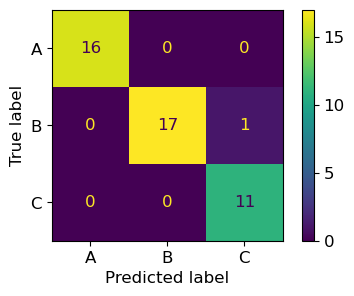

In [29]:
plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})


ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=target_names)

plt.show()


* True Positives (TPs) are the metrics on the main diagonal

* False Positives (FPs) are the metrics on the columns excluding the ones in the main diagonal, e.g., FPs for class A are cells (2,1) and (3,1)

* False Negatives (FNs) are the metrics on the rows excluding the ones in the main diagonal, e.g., FNs for class A are cells (1,2) and (1,3)

* Thus, we have 

    * $TP_A=16, FP_A=0$
    * $TP_B=17, FP_B=0$
    * $TP_C=11, FP_C=1$
    
* `Micro-Averaging`: Computes the global (total) counts of true positives (TP), false positives (FP), and false negatives (FN) across all classes

$\frac{TP_A + TP_B + TP_C} {TP_A + TP_B + TP_C + FP_A + FP_B + FP_C}=\frac{16+17+11}{16+17+11+0+0+1}=\frac{44}{45}=0.977$

* `Macro-Averaging`: Computes the metric independently for each class and then takes the average

    * $\text{Precision_A}=\frac{TP_A}{TP_A+FP_A}=\frac{16}{16}=1$
    * $\text{Precision_B}=\frac{TP_B}{TP_B+FP_B}=\frac{17}{17}=1$
    * $\text{Precision_C}=\frac{TP_C}{TP_C+FP_C}=\frac{11}{11+1}=0.92$
    * Hence, we have $\frac{\text{Precision_A}+\text{Precision_B}+\text{Precision_C}}{3}=\frac{2.92}{3}=0.973$

* If the data set is balanced, both micro-average and macro-average will result in similar scores


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Now let’s see how the micro and macro average scores vary when the dataset is an imbalanced one.

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html


In [31]:
X, y = make_classification(
    200,
    5,
    n_informative=3,
    n_classes=3,
    class_sep=0.8,
    weights=[0.75, 0.1, 0.15],
    random_state=0,
)

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

y_pred = LogisticRegression(random_state=0).fit(X_train, y_train).predict(X_test)

target_names = ["A", "B", "C"]

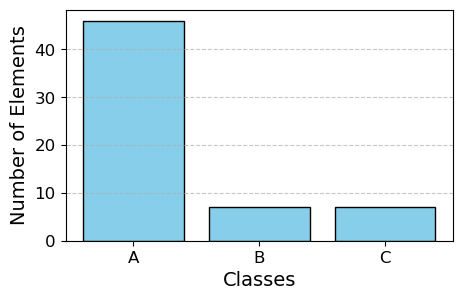

In [32]:
import numpy as np 

# Count the number of elements in each class
class_counts = np.bincount(y_test)

# Plotting the bar plot
plt.bar(target_names, class_counts, color='skyblue', edgecolor='black')
plt.xlabel('Classes', fontsize=14)
plt.ylabel('Number of Elements', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

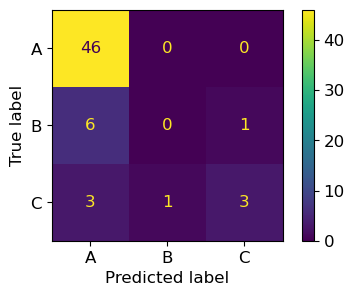

In [33]:
plt.rcParams.update({'font.size': 12, "figure.figsize": (5,3)})


ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=target_names)

plt.show()


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        46
           1       0.00      0.00      0.00         7
           2       0.75      0.43      0.55         7

    accuracy                           0.82        60
   macro avg       0.53      0.48      0.49        60
weighted avg       0.73      0.82      0.76        60



In [35]:
46/(46+9)

0.8363636363636363

In [ ]:
#macro 

(0.84+0+0.75)/3